In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from fft_lib.fft import *
sns.set_theme()

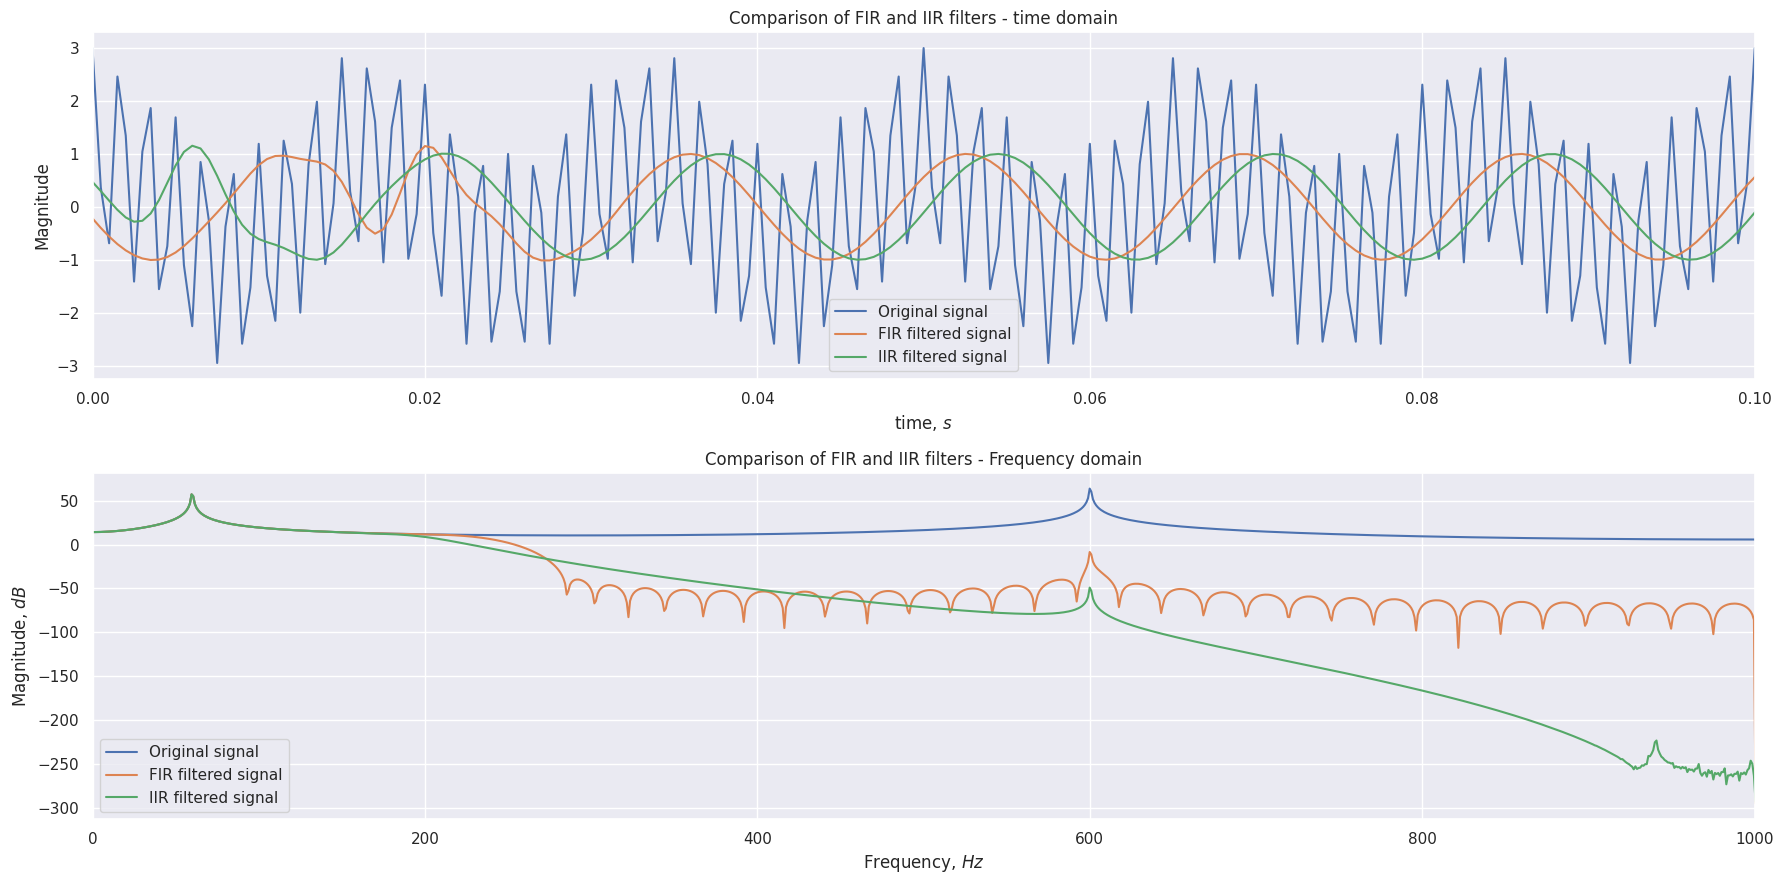

In [11]:
Fs = 2e3

t = np.arange(0, (2048/Fs), step=(1/Fs))
w = np.linspace(0, 2*np.pi, 2048)*Fs/(2*np.pi)
y = np.cos(2*np.pi*60*t) + 2*np.cos(2*np.pi*600*t)
y_fir = np.load('fir.npy')
y_iir = np.load('iir.npy')


my_fft = FFT(2048)

Y = my_fft.fft_calc(y)
Y_fir = my_fft.fft_calc(y_fir)
Y_iir = my_fft.fft_calc(y_iir)

Y_mag = 20*np.log10(np.abs(Y))
Y_fir_mag = 20*np.log10(np.abs(Y_fir))
Y_iir_mag = 20*np.log10(np.abs(Y_iir))


plt.figure(figsize=(18, 9))

plt.subplot(2,1,1)
plt.plot(t, y.real)
plt.plot(t, y_fir.real)
plt.plot(t, y_iir.real)
plt.xlim(0, 0.1)
plt.xlabel('time, $s$')
plt.ylabel('Magnitude')
plt.title('Comparison of FIR and IIR filters - time domain')
plt.legend(['Original signal', 'FIR filtered signal', 'IIR filtered signal'])

plt.subplot(2, 1, 2)
plt.plot(w, Y_mag)
plt.plot(w, Y_fir_mag)
plt.plot(w, Y_iir_mag)
plt.xlim(0, Fs/2)
plt.xlabel('Frequency, $Hz$')
plt.ylabel('Magnitude, $dB$')
plt.title('Comparison of FIR and IIR filters - Frequency domain')
plt.legend(['Original signal', 'FIR filtered signal', 'IIR filtered signal'])

plt.tight_layout()


- The IIR filter takes less taps to filter the signal
- Thus, the transient period of the IIR filtered signal is minor than the FIR filtered signal
- The frequency response of the IIR is also better
- The IIR phase response is a problem, in this case, we achieved a filter with a phase frequency approximately linear inside the pass-band frequency range